<a href="https://colab.research.google.com/github/urban-malaria/CitizenScience/blob/main/Women_Malaria_Dataset_Dry_season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sodapy

In [ ]:
import pandas as pd
from sodapy import Socrata

In [ ]:
Wlink= "https://www.dropbox.com/scl/fi/na5r9m52c6boiqezm8umn/womendata_HSB_dryseason-FINAL.csv?rlkey=c2kv59u2pfupeh28e3w2a3web&st=mkf9u6at&dl=1"
working_df= pd.read_csv(Wlink)
working_df.head()

,Serial.Number,LOCAL.GOVT..AREA.x,WARD.x,SETTLEMENT.TYPE.x,q401,q402,Repeat.Instrument,Repeat.Instance,q403,Complete..1,...,q416,q417,q417i,q418,q419,q420,q421,q422,Complete..2,city
0,732,Dala,Gobirawa,Informal,No,No,Section 4a History Of Malaria Infection,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HADIZA IDRIS HAMZA,Complete,Kano
1,23902,Dala,Gobirawa,Informal,No,No,Section 4a History Of Malaria Infection,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HADIZA IDRIS HAMZA,Complete,Kano
2,23903,Dala,Gobirawa,Informal,No,No,Section 4a History Of Malaria Infection,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HADIZA IDRIS HAMZA,Complete,Kano
3,23904,Dala,Gobirawa,Informal,No,No,Section 4a History Of Malaria Infection,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HADIZA IDRIS HAMZA,Complete,Kano
4,23905,Dala,Gobirawa,Informal,No,No,Section 4a History Of Malaria Infection,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HADIZA IDRIS HAMZA,Complete,Kano


In [ ]:
city = 'kano'

# Ensure the city column is of string type
working_df['city'] = working_df['city'].astype(str)

# Filter the DataFrame for the specified city
working_df = working_df[working_df['city'].str.lower() == city.lower()]

# Display the filtered DataFrame
print(working_df.head())

   Serial.Number LOCAL.GOVT..AREA.x    WARD.x SETTLEMENT.TYPE.x q401 q402  \
0            732               Dala  Gobirawa          Informal   No   No   
1          23902               Dala  Gobirawa          Informal   No   No   
2          23903               Dala  Gobirawa          Informal   No   No   
3          23904               Dala  Gobirawa          Informal   No   No   
4          23905               Dala  Gobirawa          Informal   No   No   

                         Repeat.Instrument  Repeat.Instance  q403  \
0  Section 4a History Of Malaria Infection                1   NaN   
1  Section 4a History Of Malaria Infection                1   NaN   
2  Section 4a History Of Malaria Infection                1   NaN   
3  Section 4a History Of Malaria Infection                1   NaN   
4  Section 4a History Of Malaria Infection                1   NaN   

   Complete..1  ...  q416 q417 q417i q418  q419  q420  q421  \
0          NaN  ...   NaN  NaN   NaN  NaN   NaN   NaN   NaN

In [ ]:
working_df.shape

(5563, 41)

In [ ]:
print(working_df.isnull().sum())

Serial.Number            0
LOCAL.GOVT..AREA.x       0
WARD.x                   1
SETTLEMENT.TYPE.x        1
q401                     0
q402                     0
Repeat.Instrument        0
Repeat.Instance          0
q403                  5563
Complete..1           5563
q404                  5385
q405a                 5385
q405b                 5562
q406                  5441
q406i                 5563
q406ii                5563
q406iii               5563
q407                  5441
q408                  5441
q409                  5531
409i                  5563
q409ii                5563
q409iii               5563
q410                  5441
q411a                 5490
q411b                 5494
q412                  5386
q413                  5498
q414                  5501
q415                  5504
q415i                 5562
q416                  5504
q417                  5544
q417i                 5546
q418                  5501
q419                  5501
q420                  5501
q

In [ ]:
# Create a list of columns to be removed, starting with q405b as they are mostly either empty or irrelevent to current research
remove_columns= [col for col in working_df.columns if col.startswith(('q406i','q407', 'q412','q413','q414','q415','q416','q417','q418','q419','q420','q421',"repeat", "complete" ))]
# Add additional columns to the list: treatement and history
remove_columns+= ['LOCAL.GOVT..AREA.x', 'SETTLEMENT.TYPE.x']
# Drop the specified columns from the DataFrame to streamline the dataset
working_df = working_df.drop(columns=remove_columns)

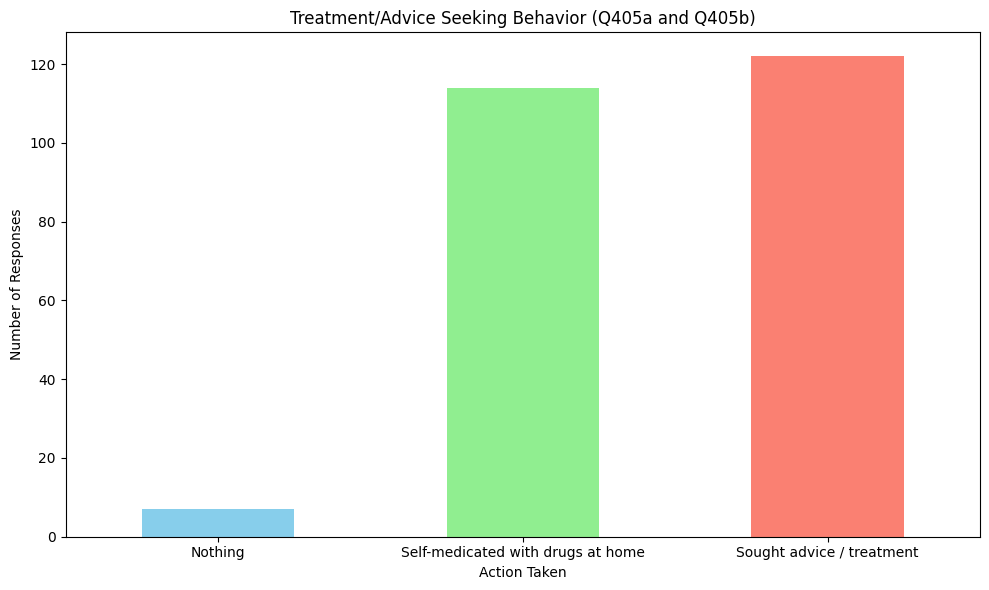

In [ ]:
import matplotlib.pyplot as plt
actions = ['Nothing', 'Self-medicated with drugs at home', 'Sought advice / treatment']

# Initialize counts dictionary
counts = {action: 0 for action in actions}

# Count occurrences in column 405a
for action in actions:
    counts[action] += working_df['q405a'].str.count(action).sum()

# Count occurrences in column 405b
for action in actions:
    counts[action] += working_df['q405b'].str.count(action).sum()

# Convert the counts dictionary to a Series for easy plotting
counts_series = pd.Series(counts)

# Display the counts

# Plot a bar chart
plt.figure(figsize=(10, 6))
counts_series.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Treatment/Advice Seeking Behavior (Q405a and Q405b)')
plt.xlabel('Action Taken')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the graph
plt.show()

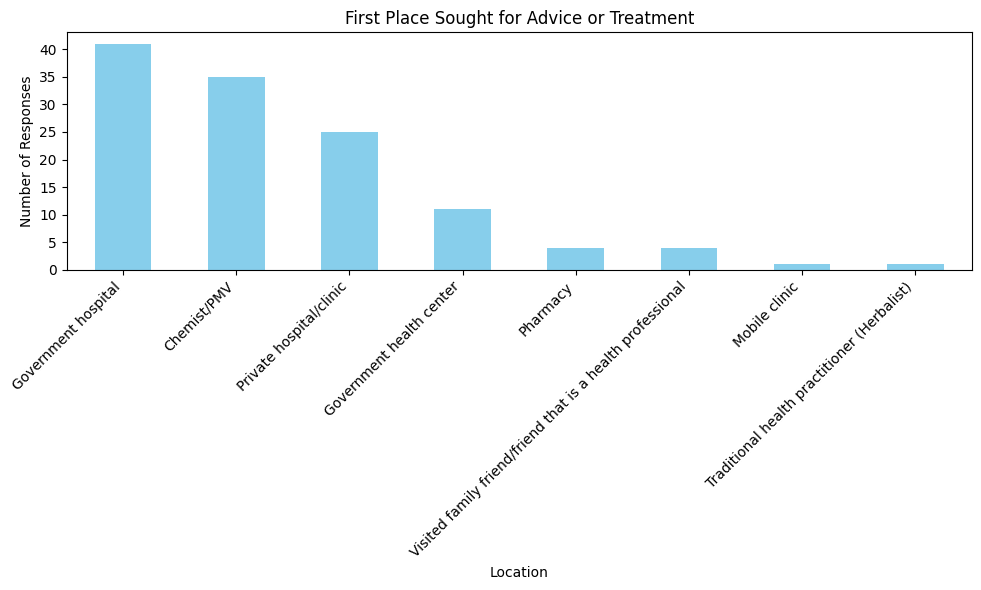

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


# Count the occurrences of each value in q406
q406_counts = working_df['q406'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = q406_counts.plot(kind='bar', color='skyblue')
plt.title('First Place Sought for Advice or Treatment')
plt.xlabel('Location')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')

# Set the y-axis to show only whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

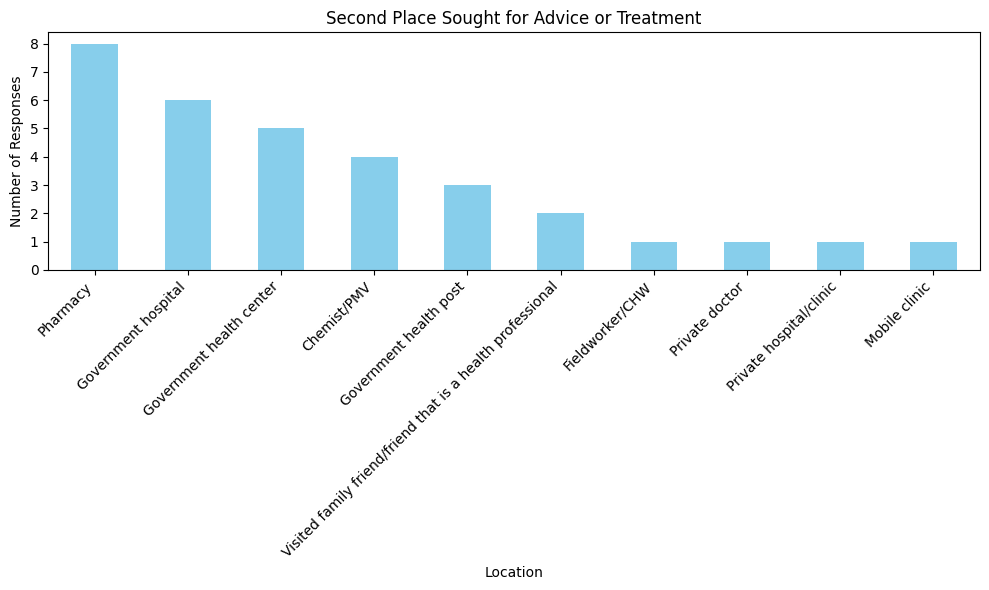

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


# Count the occurrences of each value in q406
q409_counts = working_df['q409'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = q409_counts.plot(kind='bar', color='skyblue')
plt.title('Second Place Sought for Advice or Treatment')
plt.xlabel('Location')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')

# Set the y-axis to show only whole numbers
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

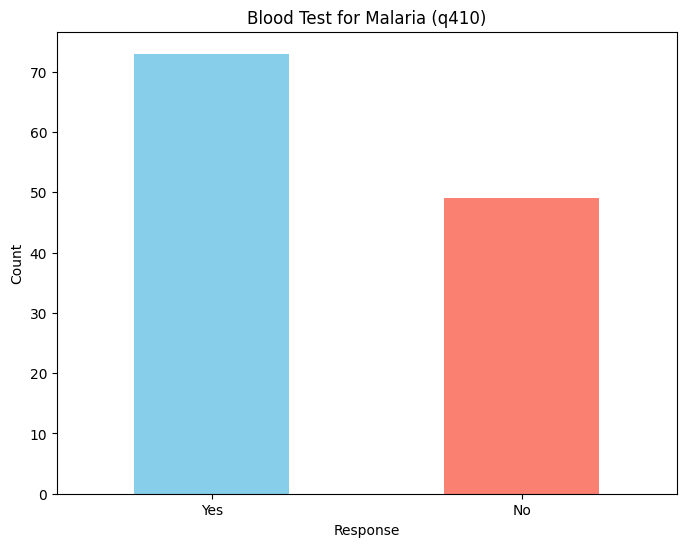

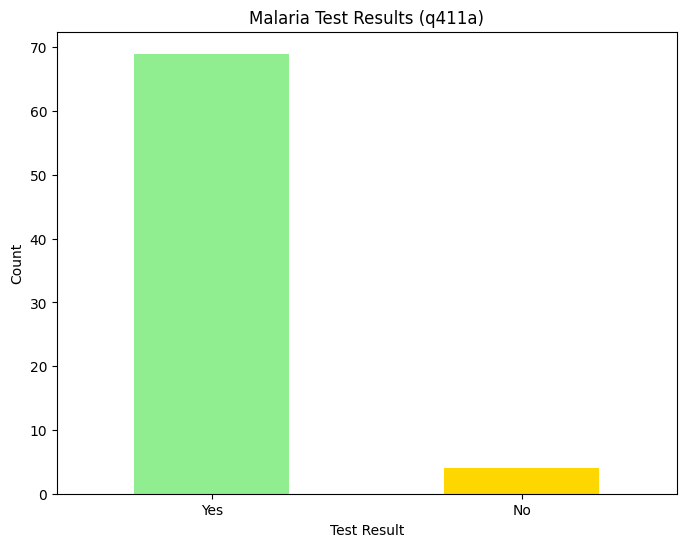

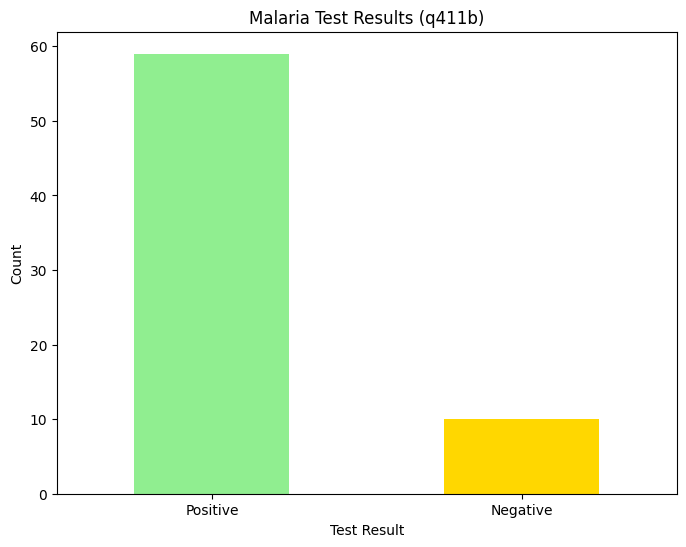

In [ ]:
import matplotlib.pyplot as plt

# Q410: Blood test for malaria
q410_counts = working_df['q410'].value_counts()

# Plotting Q410
plt.figure(figsize=(8, 6))
q410_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Blood Test for Malaria (q410)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()

# Q411: Test result
q411a_counts = working_df['q411a'].value_counts()

# Plotting Q411
plt.figure(figsize=(8, 6))
q411a_counts.plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Malaria Test Results (q411a)')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()

# Q411b: Malaria diagnosis by a healthcare provider
q411b_counts = working_df['q411b'].value_counts()

# Plotting Q411b
plt.figure(figsize=(8, 6))
q411b_counts.plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('Malaria Test Results (q411b)')
plt.xlabel('Test Result')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Positive', 'Negative'], rotation=0)
plt.show()